In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("C:/Users/porin/Desktop/Files/Telecom-Churn-Prediction/telecom_users_prep.csv")
df = df.drop(columns=['gender', 'PhoneService', 'Unnamed: 0'])

label_encoder = preprocessing.LabelEncoder()

#MultipleLines     no = 0, No phone service = 1 , yes = 2
#InternetService   DSL = 0, Fiber optic = 1, No = 2
#Contact           Month-to-month = 0, One-year = 1 , Two-year = 2
#PaymentMethod     Bank transfer = 0, Credit card = 1, Electronic check = 2

for column in df.columns:
    if column not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        df[column] = label_encoder.fit_transform(df[column])

df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,44,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,1,1,0,38,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,0,0,0,4,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,0,0,0,2,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,0,1,1,23,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,0,1,1,12,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,1,0,0,12,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


In [175]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

array = df.values
X = array[:,0:-1]
Y = array[:,-1]

rfecv = RFECV(tree.DecisionTreeClassifier(random_state=0) , scoring='accuracy')
fit = rfecv.fit(X, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

#Partner,Dependents,tenure, InternetService, OnlineSecurity, DeviceProtection
#Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

Num Features: 11
Selected Features: [False  True  True  True False  True  True False  True False False False
  True  True  True  True  True]
Feature Ranking: [2 1 1 1 4 1 1 3 1 6 7 5 1 1 1 1 1]


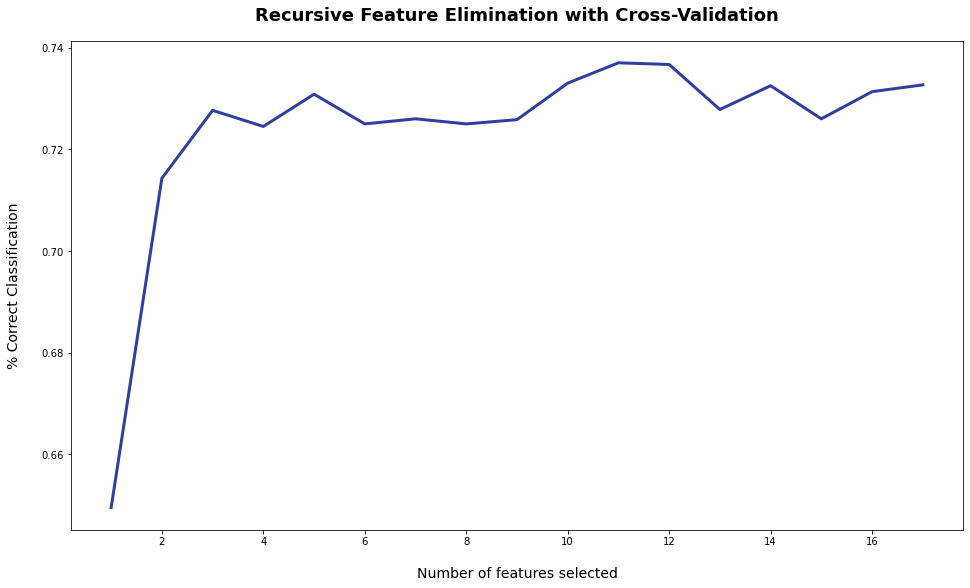

In [176]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [177]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source
from IPython.display import SVG

df_sel = df.copy(deep=False)

#select some feature
df_sel = df.drop(df.columns[[0,4,7,9,10,11]], axis=1)
df_sel

,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,72,2,1,1,2,0,1,24.10,1734.65,0
1,0,0,44,1,0,2,0,1,1,88.15,3973.20,0
2,1,0,38,1,0,0,0,1,0,74.95,2869.85,1
3,0,0,4,0,0,0,0,1,2,55.90,238.50,0
4,0,0,2,0,2,2,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,1,2,0,0,1,2,95.00,95.00,1
5982,1,1,23,0,2,2,2,1,1,91.10,2198.30,0
5983,1,1,12,2,1,1,0,1,2,21.15,306.05,0
5984,0,0,12,1,0,2,0,1,2,99.45,1200.15,1


In [170]:
from scipy.stats import iqr
for num_col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    iqr = iqr(df_sel[num_col])
    print(iqr)

47.0


TypeError: 'numpy.float64' object is not callable

In [178]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

array = df_sel.values
class0_count, class1_count = df_sel['Churn'].value_counts()

# Separate class
class_0 = df_sel[df_sel['Churn'] == 0]
class_1 = df_sel[df_sel['Churn'] == 1]

class_0_under = class_0.sample(class1_count)
under_df = pd.concat([class_0_under, class_1], axis=0).values

X = under_df[:,0:-1]
y = under_df[:,-1]

In [179]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create Decision Tree classifer object
precision = []
maxi_pre = 0
for i in range(1, 300):
    clf = RandomForestClassifier(class_weight= {0: 1, 1: i}, random_state= 1, criterion='gini')

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    y_score = clf.score(X,y)
    precision.append(classification_report(y_test,y_pred, output_dict=True)['1']['precision'])
#     print(classification_report(y_test,y_pred))
    # class labels
print(precision.index(max(precision)) +1, max(precision))

KeyError: '1'

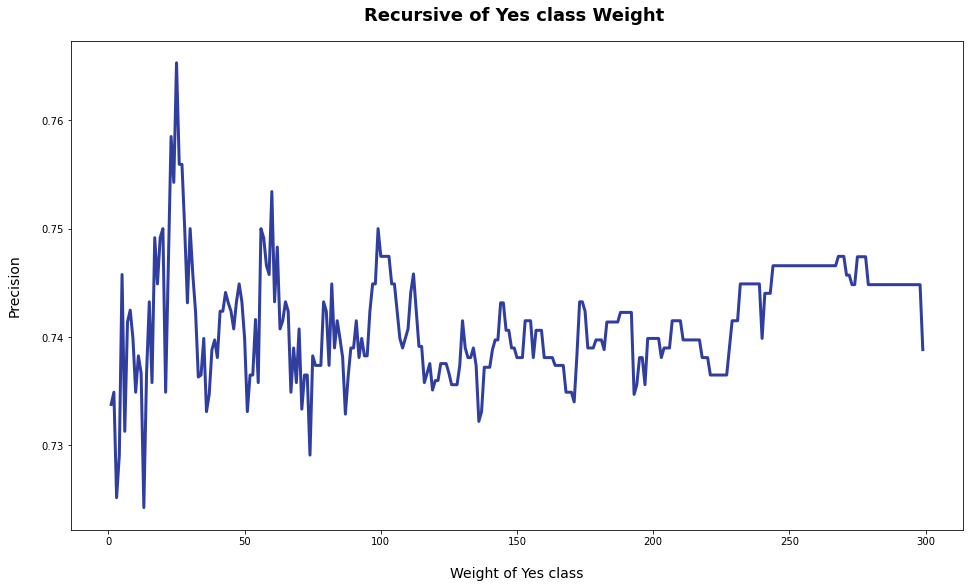

In [138]:
# show appropriate weight
plt.figure(figsize=(16, 9))
plt.title('Recursive of Yes class Weight ', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Weight of Yes class', fontsize=14, labelpad=20)
plt.ylabel('Precision', fontsize=14, labelpad=20)
plt.plot(range(1, 300), precision, color='#303F9F', linewidth=3)

plt.show()

In [125]:
# Split dataset into training set and test set with stratified k-fold
skf = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 1)
for train_index, test_index in skf.split(X, y):
    X_train_skf, X_test_skf = X[train_index], X[test_index]
    y_train_skf, y_test_skf = y[train_index], y[test_index]
    
    # Create Decision Tree classifer object
    clf_skf = DecisionTreeClassifier()
    
    # Train Decision Tree Classifer
    clf_skf = clf_skf.fit(X_train_skf, y_train_skf)
    
    #Predict the response for test dataset
    y_pred_skf = clf_skf.predict(X_test_skf)
    y_score_skf = clf_skf.score(X,y)
    print(classification_report(y_test_skf, y_pred_skf))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       318
           1       0.70      0.69      0.69       317

    accuracy                           0.70       635
   macro avg       0.70      0.70      0.70       635
weighted avg       0.70      0.70      0.70       635

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       318
           1       0.66      0.68      0.67       317

    accuracy                           0.67       635
   macro avg       0.67      0.67      0.67       635
weighted avg       0.67      0.67      0.67       635

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       317
           1       0.67      0.69      0.68       318

    accuracy                           0.68       635
   macro avg       0.68      0.68      0.68       635
weighted avg       0.68      0.68      0.68       635

              preci

In [ ]:
graph = Source(export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(df_sel.iloc[:,0:-1].columns),class_names=['0','1']))

display(SVG(graph.pipe(format='svg')))
graph.format = 'png'
graph.render('Dtree_chrun',view=True)

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from ann_visualizer.visualize import ann_viz

model = Sequential()

# first layer: 11 nodes,  dimensions 8, Rectifed Linear Unit function (ReLU)
model.add(Dense(11, input_dim=11, activation='linear'))

# additional layer: 8 nodes,  Rectifed Linear Unit function (ReLU)
for i in range(1,50):
    model.add(Dense(7, activation='linear'))
    
# output layer: 1 node, sigmoid function
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_52 (Dense)             (None, 7)                 84        
_________________________________________________________________
dense_53 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_54 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_55 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_57 (Dense)             (None, 7)                

In [113]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5472 - accuracy: 0.7312 - val_loss: 0.5506 - val_accuracy: 0.7126
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7302 - val_loss: 0.5611 - val_accuracy: 0.7126
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7277 - val_loss: 0.5806 - val_accuracy: 0.7047
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.7198 - val_loss: 0.5543 - val_accuracy: 0.7087
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7213 - val_loss: 0.5593 - val_accuracy: 0.7028
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7238 - val_loss: 0.5570 - val_accuracy: 0.7106
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7322 - val_loss: 0.5642 - val_accuracy: 0.6909
Epoch 8/200
6

In [114]:
y_pred_net = np.round(model.predict(X_test))
print(classification_report(y_test,y_pred_net))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       328
           1       0.72      0.82      0.77       307

    accuracy                           0.76       635
   macro avg       0.76      0.76      0.76       635
weighted avg       0.76      0.76      0.76       635

